In [1]:
import pandas as pd
import numpy as np
import os

path = '../data/random/'
fcpath = '../data/random/final_conditions/runs/fc'
simIDmax = 5000

df = pd.read_csv(path+'random.csv', index_col=0)
df.tail()

,runstring
4995,0004995.bin
4996,0004996.bin
4997,0004997.bin
4998,0004998.bin
4999,0004999.bin


In [2]:
import rebound
def get_instability_time(row):
    try:
        sim = rebound.Simulation.from_file(fcpath+row["runstring"])
        return sim.t
    except:
        return np.nan

In [3]:
%%time
df["instability_time"] = df.apply(get_instability_time, axis=1)

/mnt/raid-cita/dtamayo/stability/lib/python3.4/site-packages/rebound/simulation.py:374: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


CPU times: user 900 ms, sys: 2.53 s, total: 3.43 s
Wall time: 22.4 s


In [4]:
df.head()

,runstring,instability_time
0,0000000.bin,1.235644e+07
1,0000001.bin,1.348749e+05
2,0000002.bin,1.276381e+04
3,0000003.bin,1.000000e+09
4,0000004.bin,8.791888e+01


In [5]:
df.shape

(5000, 2)

(array([    3.,    54.,   367.,   496.,   467.,   482.,   409.,   310.,
          227.,  2185.]),
 array([-1.46041281, -0.41437153,  0.63166975,  1.67771103,  2.72375231,
         3.76979359,  4.81583487,  5.86187616,  6.90791744,  7.95395872,  9.        ]),
 <a list of 10 Patch objects>)

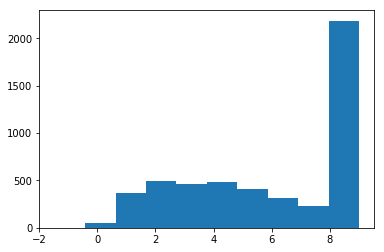

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(np.log10(df['instability_time']))

In [8]:
a = df["instability_time"]==1.e9
a.sum()

1993

In [3]:
df.to_csv('/mnt/raid-cita/dtamayo/newstability/data/dataframes/dfelements_full.csv', encoding='ascii')

In [4]:
dfcut = df.loc[df["Norbits"] > 1000.]
dfcut.shape

(5469, 30)

In [5]:
dfcut.to_csv('/mnt/raid-cita/dtamayo/newstability/data/dataframes/dfelements_full.csv', encoding='ascii')